In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import codecs
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
data  = pd.DataFrame(reviewlist)
data

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,Reviewed in India on 26 November 2023
5,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
6,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,Reviewed in India on 15 November 2023
7,4.0 out of 5 stars\nRecharging with magnet,4.0,Recharging with that magnet can be a nightmare...,Reviewed in India on 28 November 2023
8,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,Reviewed in India on 20 November 2023
9,4.0 out of 5 stars\nBT Calling,4.0,What I liked most is bt calling,Reviewed in India on 25 November 2023


In [7]:
data["Review_Date"] = data["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
data.head(20)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,26 November 2023
5,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
6,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
7,4.0 out of 5 stars\nRecharging with magnet,4.0,Recharging with that magnet can be a nightmare...,28 November 2023
8,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
9,4.0 out of 5 stars\nBT Calling,4.0,What I liked most is bt calling,25 November 2023


In [9]:
data.to_csv("Boat_Smart_Watch_Review.csv")

In [10]:
review = pd.read_csv('Boat_Smart_Watch_Review.csv')
review

,Unnamed: 0,Title,Rating,Review,Review_Date
0,0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,26 November 2023
5,5,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
6,6,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
7,7,4.0 out of 5 stars\nRecharging with magnet,4.0,Recharging with that magnet can be a nightmare...,28 November 2023
8,8,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
9,9,4.0 out of 5 stars\nBT Calling,4.0,What I liked most is bt calling,25 November 2023


In [11]:
review.drop(['Unnamed: 0'],inplace=True,axis=1)

In [12]:
review

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,26 November 2023
5,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
6,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
7,4.0 out of 5 stars\nRecharging with magnet,4.0,Recharging with that magnet can be a nightmare...,28 November 2023
8,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
9,4.0 out of 5 stars\nBT Calling,4.0,What I liked most is bt calling,25 November 2023


In [13]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [14]:
review.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10.0,3.8,0.632456,3.0,3.25,4.0,4.0,5.0


In [15]:
review.isnull().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [16]:
review.dropna(subset=['Review'],inplace=True)
review.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,26 November 2023


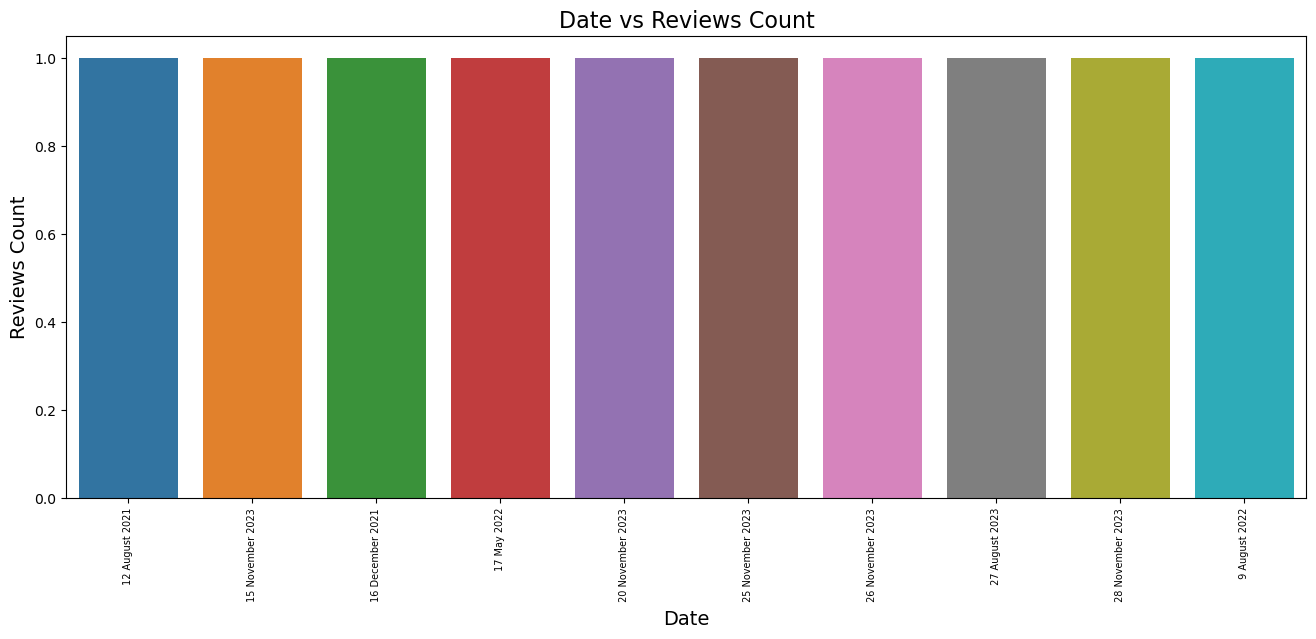

In [17]:
#Creating a dataframe
dayreview = pd.DataFrame(review.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

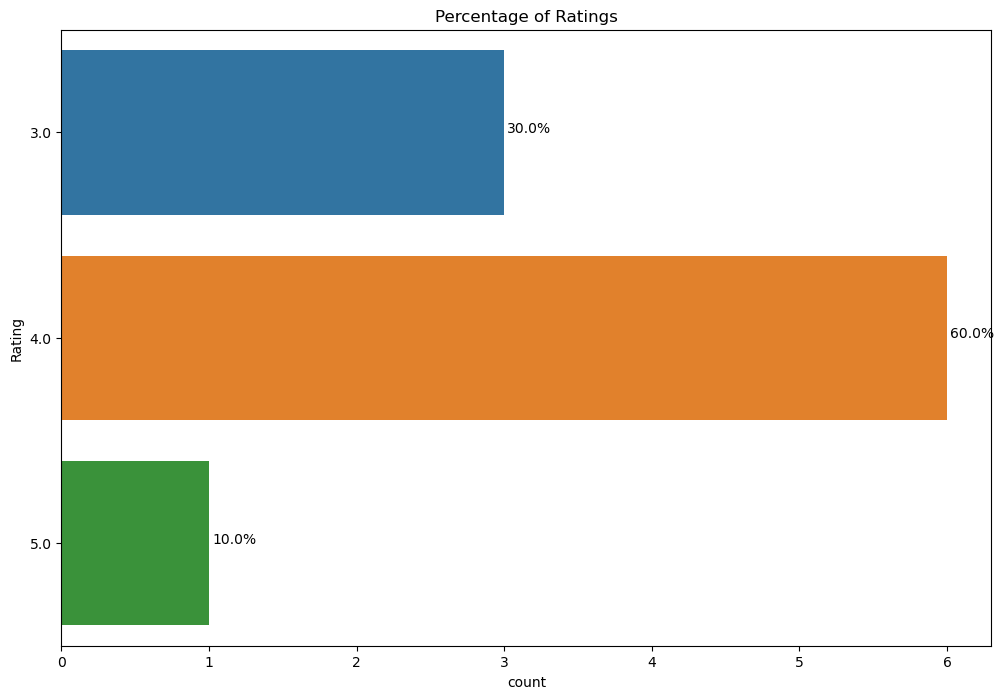

In [18]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = review)
total = len(review)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [19]:
review['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    Gros:1. Premium build quality with matter fini...
4    The features are good but there's no speaker t...
Name: Review, dtype: object

In [20]:
boat_review = review[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,Pros:1. Premium build quality with matte finis...
4,The features arre good but there's no speaker ...
5,This smart (model Boat extend plus) watch is f...
6,1. Good for Bluetooth calling but very difficu...
7,Recharging with that magnet can be a nightmare...
8,Worst watch . Worst service. Application got h...
9,What I liked most is bt calling


In [21]:
boat_review.reset_index(drop=True, inplace=True)

In [22]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


  0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...


# Text Pre-processing Techniques

In [25]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text 

In [26]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


In [27]:
cleaned_reviews = []
for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))
dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


In [28]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


In [29]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


# remove emoji

In [30]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [31]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


# Removing Stop words

In [32]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [33]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [34]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,liked bt calling,what i liked bt calling


In [35]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [36]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [pro, premium, build, quality, matte, finishin...
4    [feature, arre, good, speaker, decline, call, ...
5    [smart, model, boat, extend, plus, watch, func...
6    [good, bluetooth, calling, difficult, use, blu...
7    [recharging, magnet, nightmare, werable, devic...
8    [worst, watch, worst, service, application, go...
9                                 [liked, bt, calling]
Name: Clean_Reviews, dtype: object

In [37]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...,"[feature, arre, good, speaker, decline, call, ..."
5,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
7,recharging magnet nightmare werable device fri...,recharging magnet nightmare. more werable-devi...,"[recharging, magnet, nightmare, werable, devic..."
8,worst watch worst service application got hang...,worst watch . worst service. application got h...,"[worst, watch, worst, service, application, go..."
9,liked bt calling,what i liked bt calling,"[liked, bt, calling]"


In [38]:
stemmer = SnowballStemmer("english")

In [39]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,pro premium build qualiti matt finish sturdi p...
4,featur arr good speaker declin call accept scr...
5,smart model boat extend plus watch function we...
6,good bluetooth call difficult use bluetooth ea...
7,recharg magnet nightmar werabl devic friend op...
8,worst watch worst servic applic got hang due w...
9,like bt call


# Converting words to Lemma

In [40]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,pro premium build quality matte finishing stur...
4,feature arre good speaker decline call accept ...
5,smart model boat extend plus watch functioning...
6,good bluetooth calling difficult use bluetooth...
7,recharging magnet nightmare werable device fri...
8,worst watch worst service application got hang...
9,liked bt calling


# Applying bag of Words without N grams

In [41]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [42]:
print(cv.get_feature_names_out()[109:200])

['break' 'breath' 'breathing' 'bright' 'brightness' 'brings' 'browsing'
 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burnt'
 'button' 'buy' 'buying' 'cable' 'cache' 'calculated' 'calculation'
 'calculator' 'calender' 'call' 'called' 'caller' 'callin' 'calling'
 'calorie' 'calory' 'cals' 'camera' 'cannot' 'carddesign' 'care' 'case'
 'category' 'change' 'changed' 'charge' 'charger' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'childish' 'chinese' 'choose'
 'claim' 'claimed' 'classic' 'clean' 'clear' 'clearing' 'clearly' 'click'
 'clipuser' 'clone' 'close' 'cloud' 'collection' 'color' 'colour'
 'colourcharging' 'combi' 'come' 'comfortable' 'comfortdisplaywatch'
 'comfortwhen' 'coming' 'command' 'common' 'company' 'compared' 'complain'
 'complaining' 'completely' 'con' 'condition' 'configuration' 'configure'
 'connect' 'connected' 'connecting' 'connectivity' 'connects'
 'considerably']


In [43]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advertised' 'aggregate' 'alarm' 'alert'
 'alexa' 'allowed' 'along' 'also' 'aluminium' 'always' 'amazfit' 'amazon'
 'amoled' 'amount' 'analog' 'android' 'angle' 'animal' 'animation'
 'anniversary' 'another' 'answer' 'anything' 'anywhere' 'aod' 'apart'
 'app' 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appeared' 'apple'
 'application' 'apps' 'appyou' 'around' 'arre' 'aside' 'asks' 'aspect'
 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'auto' 'available' 'average' 'away' 'back'
 'background' 'badge' 'band' 'bank' 'bar' 'based' 'basic' 'bathing'
 'battery' 'beautiful' 'bed' 'beginning' 'believe' 'best' 'better'
 'beyond' 'bezel' 'big' 'bike' 'bip' 'bi

#  N-grams (Bigrams & Trigrams)

In [44]:
dataframe = dataframe.reset_index(drop=True)

In [45]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [46]:
corpus[3]

'pro premium build qualiti matt finish sturdi polycarbon frame good soft silicon strap r absolut flush bodi watch attract trendi colour heart rate except heart rate spike weight train pedomet step counter accur spo compar puls oximet read smart watch offer accuraci sleep track accur bed time wake time durat stage sleep inaccur light deep sleep wake detect rem sleep detect sleep data watch synchronis smoothli boat wave app issu warn msg watch worn hand properli detect data surfac larg clear bright sharp lcd ip display even sun touch smooth experienc jitter ui also lag time attach temper glass sometim function requir tap work accept scroll respons finger move diagon instead vertic app gp work superbl excel rout track map featur advertis descript bluetooth connect good mobil kept close proxim boat wave app must remain run background time definit splash proof though nt take risk submerg watch notif work problem call alert sm msg social medium app notif lag though provis sec lag turn alexa 

# Applying Countvectorizer

In [47]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [48]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'also'], dtype=object)

In [49]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [50]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,...,worst,worth,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye
0,0,0,1,4,3,0,0,1,0,0,...,0,1,4,2,2,0,20,7,1,1
1,0,0,0,3,1,1,1,3,0,1,...,0,0,0,0,0,0,1,0,1,1
2,0,1,1,0,1,0,0,6,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,3,0,3,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer

In [51]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [52]:
corpus[4]

'featur arr good speaker declin call accept screen fragil particularli buy screen guard along prevent small scratch'

In [53]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [54]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'also'], dtype=object)

In [55]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,...,worst,worth,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye
0,0.000000,0.000000,0.012636,0.050545,0.033704,0.000000,0.000000,0.011235,0.000000,0.000000,...,0.000000,0.014443,0.067961,0.033981,0.033981,0.000000,0.288867,0.118932,0.014443,0.012636
1,0.000000,0.000000,0.000000,0.071109,0.021074,0.027093,0.027093,0.063221,0.000000,0.023703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027093,0.000000,0.027093,0.023703
2,0.000000,0.024838,0.024838,0.000000,0.022083,0.000000,0.000000,0.132497,0.028390,0.024838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.024838,0.000000,0.000000,0.000000,0.000000
3,0.035353,0.078879,0.000000,0.078879,0.023376,0.030053,0.030053,0.000000,0.000000,0.026293,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.026293,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.192355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.036470,0.000000,0.000000,0.000000,0.000000,0.032425,0.041686,0.000000,...,0.000000,0.041686,0.000000,0.000000,0.000000,0.036470,0.000000,0.000000,0.000000,0.072941
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.652475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Named Entity Recognition (NER)

In [57]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

In [58]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [59]:
for token in doc_block[:50]:
    print(token,token.pos_)

review NOUN
overviewaverage NOUN
boat NOUN
today NOUN
launched VERB
boat NOUN
xtend NOUN
company NOUN
latest ADJ
budget NOUN
smartwatch NOUN
price NOUN
tag NOUN
r NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
come VERB
stylish ADJ
design NOUN
resembling VERB
apple NOUN
watch NOUN
moreover ADV
built VERB
amazon PROPN
alexa ADJ
support NOUN
spo NOUN
tracking VERB
stress NOUN
tracking VERB
much ADJ
coming VERB
budget NOUN
segment NOUN
worth ADJ
buy VERB
smartwatch NOUN
query NOUN
nothing PRON
worry VERB
detailed ADJ
review NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
clear ADJ
doubt PROPN
contentsbox PROPN


In [60]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [61]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,8
neg,2


In [62]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...,"[feature, arre, good, speaker, decline, call, ...",0.458333,0.154167


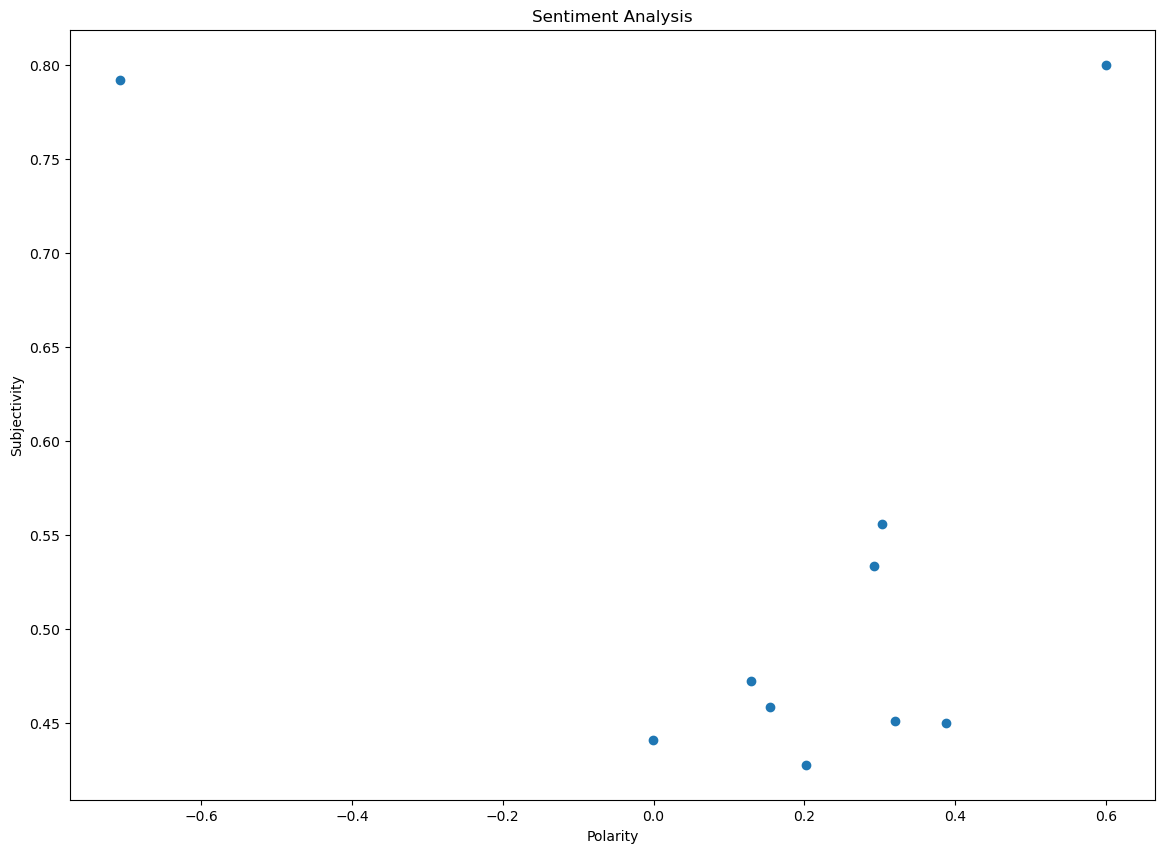

In [63]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [64]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296,pos
4,feature arre good speaker decline call accept ...,the features arre good there's speaker decline...,"[feature, arre, good, speaker, decline, call, ...",0.458333,0.154167,pos


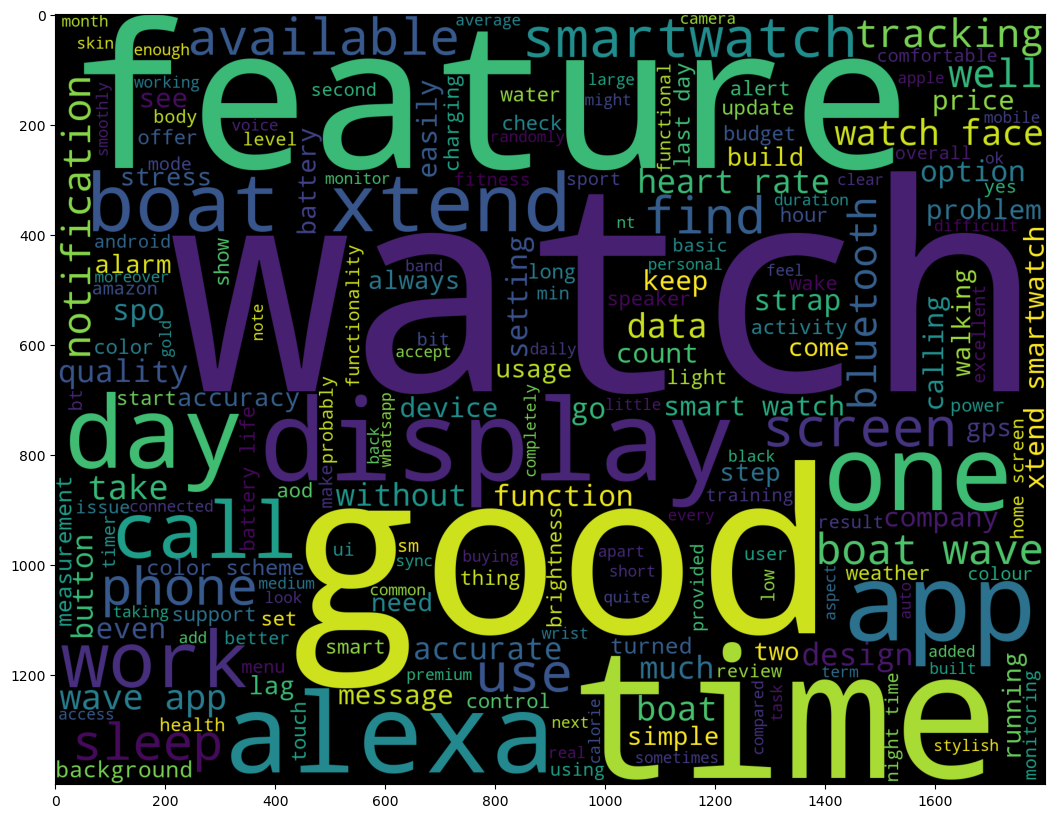

In [65]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);